In [0]:
import torch
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn

In [0]:
n_pts = 500 # number of data points
# centers = [[-0.5, 0.5], [0.5, -0.5]]
x, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2) # x : data points , y: label values
# larger noise values will cause them to look less organize and more cluster # factor : simply refers to the size of the inner circle in compare to the larger outer circle
# noise values of 0 will give us 2 perfectly circular shapes ...
# factor values of 1 will return 2 circles with the same size
# print(y)

![alt text](https://)

---

***bold text***

In [0]:
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(500, 1)) # 100 rows and 1 column

In [0]:
def scatter_plot():
  plt.scatter(x[y==0, 0], x[y==0, 1])
  plt.scatter(x[y==1, 0], x[y==1, 1])

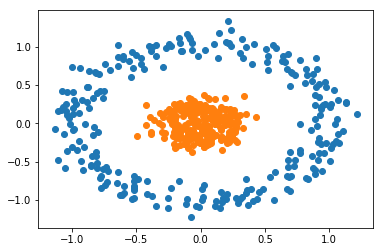

In [5]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: return 0
  

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1) # 4 is the hidden layer containing 4 nodes
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) # lr : learning rate
# what is diffrent with Adam Algo is it's adaptive learning method algorithm
# Adam Algo is a combination of 2 other extensions of Stacastic Gradient Dicent (SGD) => Adagrad , RMSprop , 

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward() # to compute the derevative
  optimizer.step()

epoch: 0 loss 0.03219376131892204
epoch: 1 loss 0.030534055083990097
epoch: 2 loss 0.0290041696280241
epoch: 3 loss 0.027612734586000443
epoch: 4 loss 0.02625438943505287
epoch: 5 loss 0.024975882843136787
epoch: 6 loss 0.023773781955242157
epoch: 7 loss 0.022613566368818283
epoch: 8 loss 0.02153049223124981
epoch: 9 loss 0.020530108362436295
epoch: 10 loss 0.019585492089390755
epoch: 11 loss 0.01869046501815319
epoch: 12 loss 0.01785285212099552
epoch: 13 loss 0.01706552878022194
epoch: 14 loss 0.016317913308739662
epoch: 15 loss 0.01561296358704567
epoch: 16 loss 0.014954479411244392
epoch: 17 loss 0.014336624182760715
epoch: 18 loss 0.013753145933151245
epoch: 19 loss 0.013203581795096397
epoch: 20 loss 0.012687692418694496
epoch: 21 loss 0.012201179750263691
epoch: 22 loss 0.011739945970475674
epoch: 23 loss 0.011303538456559181
epoch: 24 loss 0.010892692022025585
epoch: 25 loss 0.010505910962820053
epoch: 26 loss 0.010140296071767807
epoch: 27 loss 0.009794124402105808
epoch: 28 l

Text(0.5, 0, 'Epoch')

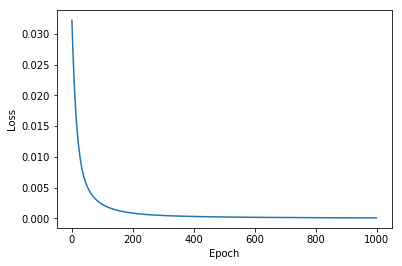

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [0]:
def plot_decision_boundary(x, y): # x : training Data, y : our labels
  x_span = np.linspace(min(x[:, 0]) -0.25, max(x[:, 0]) + 0.25) # min(x[:, 0]) => gives us the minimum horisental value of the first column
  # max(x[:, 0]) => gives us the maximum horizental cordinates value
  y_span = np.linspace(min(x[:, 1]) - 0.25, max(x[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  xx.ravel() # make xx one dimensional rather than 2-dimensional
  yy.ravel()
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z) # z contains the magnitude of the probability at each coresponding cordinate
  
#   print(x_span)

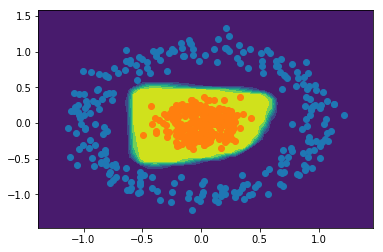

In [33]:
plot_decision_boundary(x, y)
scatter_plot()

Prediction is :  1


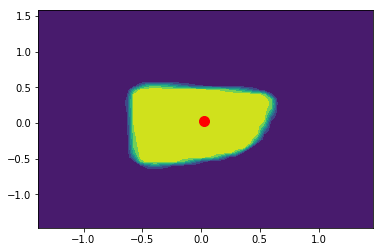

In [35]:
x1 = 0.025
y1 = 0.025
point = torch.Tensor([x1, y1])
prediction = model.predict(point)
plt.plot([x1], [y1], marker='o', markersize=10, color='red')
print("Prediction is : ", prediction)
plot_decision_boundary(x, y1)